In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [28]:
train_path = 'D:/2. FREELANCE/PYTHON/machine learning batik/data1/archive/DATASET/DATASET/TRAIN'
test_path = 'D:/2. FREELANCE/PYTHON/machine learning batik/data1/archive/DATASET/DATASET/TEST'

train_datagen = ImageDataGenerator(
#    rescale=1./255,
    shear_range=0.2,
    rotation_range=30,
    fill_mode='reflect',
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

validation_datagen = ImageDataGenerator(
#    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=30,
    color_mode='rgb'
)

validation_generator = validation_datagen.flow_from_directory(
    directory=test_path,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=30,
    color_mode='rgb'
)

Found 1050 images belonging to 15 classes.
Found 300 images belonging to 15 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

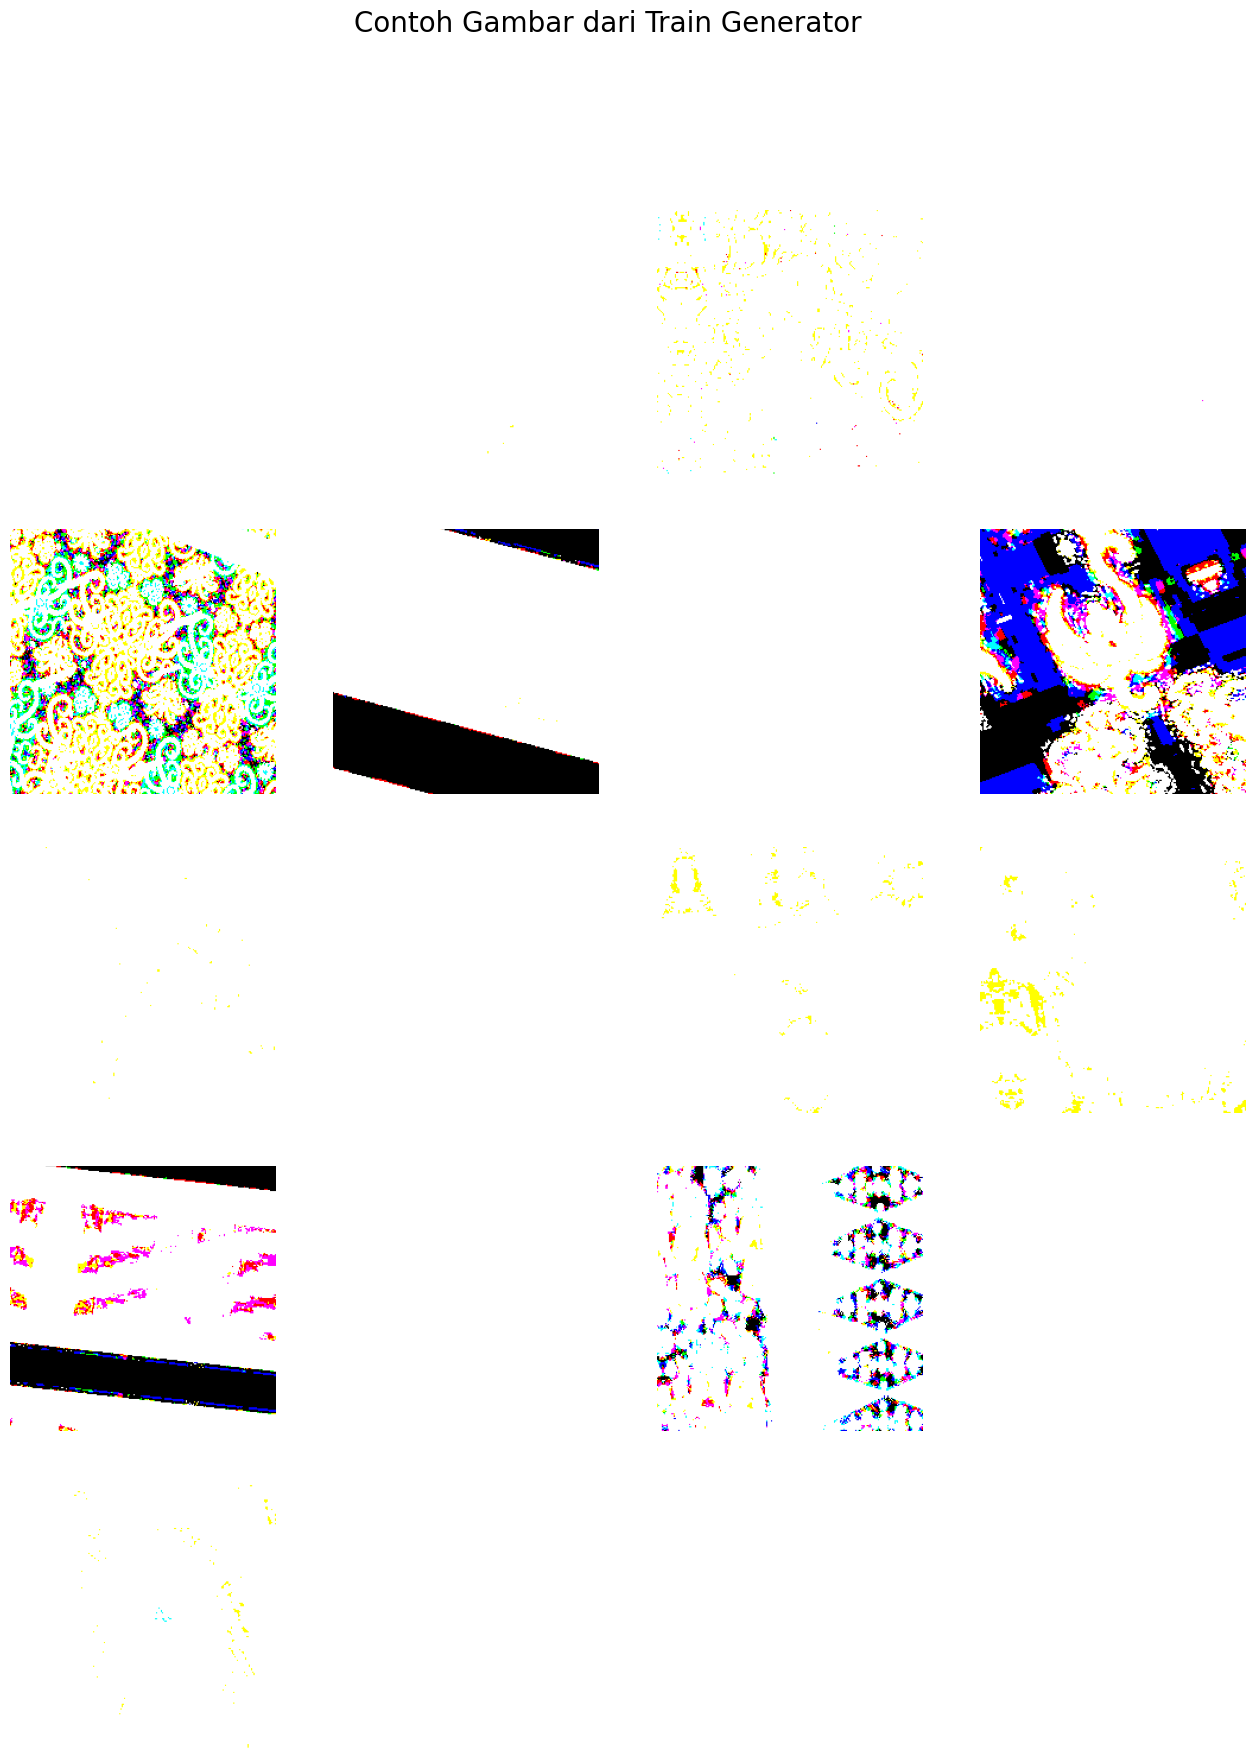

In [29]:
plt.figure(figsize=(16, 20))
plt.suptitle('Contoh Gambar dari Train Generator', fontsize=20)

for i in range(20):
    img, label = train_generator.next()
    plt.subplot(5, 4, i+1)
    plt.imshow(img[0])
    plt.axis('off')

plt.show()

In [30]:
motives_dict = train_generator.class_indices
print(motives_dict)

{'Batik Bali': 0, 'Batik Betawi': 1, 'Batik Cendrawasih': 2, 'Batik Dayak': 3, 'Batik Geblek Renteng': 4, 'Batik Ikat Celup': 5, 'Batik Insang': 6, 'Batik Kawung': 7, 'Batik Lasem': 8, 'Batik Megamendung': 9, 'Batik Pala': 10, 'Batik Parang': 11, 'Batik Poleng': 12, 'Batik Sekar Jagad': 13, 'Batik Tambal': 14}


In [31]:
base_model = EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
#     alpha=1.0,
    pooling='avg'
)

base_model.trainable = False

In [37]:
from tensorflow.keras.optimizers import Adamax

clear_session()

model = Sequential([
    base_model,
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(15, activation='softmax')
])

model.compile(
    optimizer=Adamax(learning_rate=1e-2), 
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                975       
                                                                 
Total params: 4132530 (15.76 MB)
Trainable params: 82959 (324.06 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


In [38]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False,
                                   monitor='val_accuracy', 
                                   mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=10, 
                               mode='max', 
                               verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.1, patience=5, 
                              min_lr=1e-9, verbose=1)

callbacks_list = [model_checkpoint, early_stopping, reduce_lr]

# Melatih model dengan menggunakan callback
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=1050//30,
    validation_steps=300//30,
    shuffle=True,
    epochs=50,
    callbacks=callbacks_list
)

Epoch 1/50
35/35 [==============================] - ETA: 0s - loss: 1.9411 - accuracy: 0.3971
Epoch 1: val_accuracy improved from -inf to 0.59000, saving model to best_model.h5
35/35 [==============================] - 52s 1s/step - loss: 1.9411 - accuracy: 0.3971 - val_loss: 1.2466 - val_accuracy: 0.5900 - lr: 0.0100
Epoch 2/50
35/35 [==============================] - ETA: 0s - loss: 1.1095 - accuracy: 0.6476
Epoch 2: val_accuracy improved from 0.59000 to 0.68667, saving model to best_model.h5
35/35 [==============================] - 40s 1s/step - loss: 1.1095 - accuracy: 0.6476 - val_loss: 1.0191 - val_accuracy: 0.6867 - lr: 0.0100
Epoch 3/50
35/35 [==============================] - ETA: 0s - loss: 0.9134 - accuracy: 0.7238
Epoch 3: val_accuracy improved from 0.68667 to 0.70333, saving model to best_model.h5
35/35 [==============================] - 43s 1s/step - loss: 0.9134 - accuracy: 0.7238 - val_loss: 0.9968 - val_accuracy: 0.7033 - lr: 0.0100
Epoch 4/50
35/35 [===================

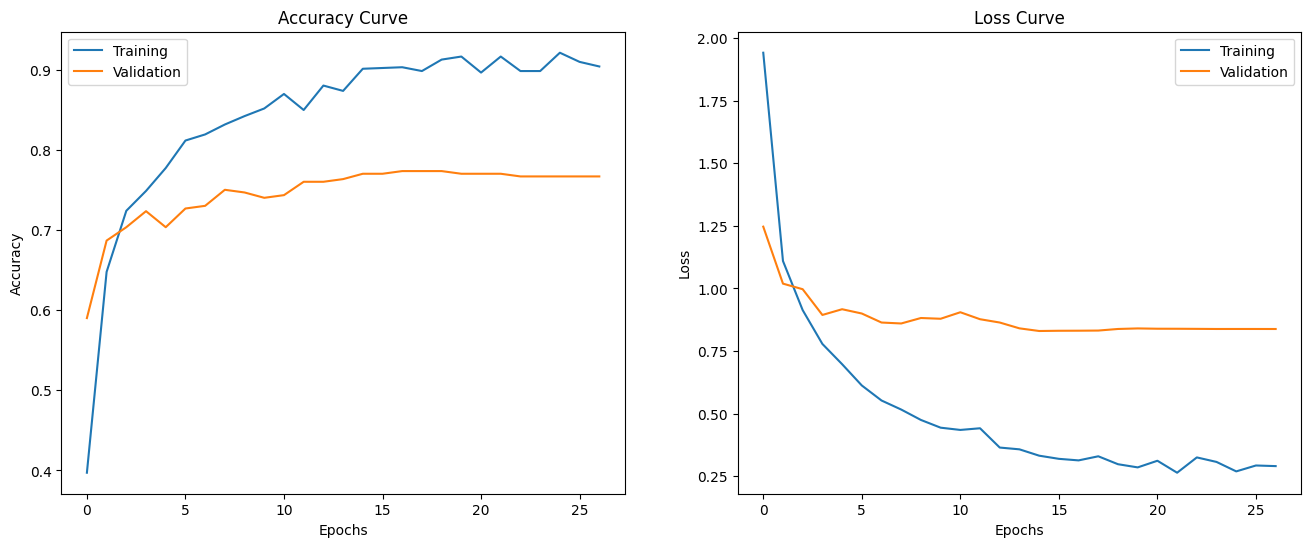

In [39]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.title('Accuracy Curve')
plt.plot(train_acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.title('Loss Curve')
plt.plot(train_loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [40]:
test_dir = 'D:/2. FREELANCE/PYTHON/machine learning batik/data1/archive/DATASET/DATASET/TEST/'

for motive in motives_dict.keys():
    images_list = os.listdir(os.path.join(test_dir, motive))    
#     plt.figure(figsize=(16, 20))

    correct_count = 0

    for idx, image in enumerate(images_list):
        img_path = f'D:/2. FREELANCE/PYTHON/machine learning batik/data1/archive/DATASET/DATASET/TEST/{motive}/{image}'
        img = load_img(img_path, target_size=(224, 224))

        img_array = img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        motives_list = list(motives_dict.keys())
        prediction = model(img_array)
        pred_idx = np.argmax(prediction)
        pred_motive = motives_list[pred_idx]
        pred_confidence = prediction[0][pred_idx] * 100

        if pred_motive == motive:
            correct_count += 1

#         plt.subplot(5, 4, idx+1)
#         plt.title(f'Actual: {motive}\nPrediction: {pred_motive} {pred_confidence:.2f}%')
#         plt.imshow(img)
#         plt.axis('off')
    
    print(f'{motive} Predictions --> {correct_count}/20 correct')
# plt.show()

Batik Bali Predictions --> 9/20 correct
Batik Betawi Predictions --> 14/20 correct
Batik Cendrawasih Predictions --> 13/20 correct
Batik Dayak Predictions --> 15/20 correct
Batik Geblek Renteng Predictions --> 15/20 correct
Batik Ikat Celup Predictions --> 17/20 correct
Batik Insang Predictions --> 19/20 correct
Batik Kawung Predictions --> 16/20 correct
Batik Lasem Predictions --> 14/20 correct
Batik Megamendung Predictions --> 19/20 correct
Batik Pala Predictions --> 12/20 correct
Batik Parang Predictions --> 17/20 correct
Batik Poleng Predictions --> 19/20 correct
Batik Sekar Jagad Predictions --> 15/20 correct
Batik Tambal Predictions --> 16/20 correct
